In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
 create_engine=("sqlite:///hawaii.sqlite")

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
###Database setup
engine = create_engine("sqlite:///hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# refelct the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [8]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [9]:
results = session.query(Measurement.date, Measurement.prcp)

In [10]:
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [11]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all() 

In [12]:
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [13]:
df = pd.DataFrame(results, columns=['date','precipitation'])

In [14]:
print(df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-24           0.08
2     2016-08-25           0.08
3     2016-08-26           0.00
4     2016-08-27           0.00
...          ...            ...
2225  2017-08-19           0.09
2226  2017-08-20            NaN
2227  2017-08-21           0.56
2228  2017-08-22           0.50
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [15]:
df.set_index(df['date'], inplace=True)

In [16]:
print (df.set_index)

<bound method DataFrame.set_index of                   date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]>


In [17]:
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

 2017-08-23           0.45


In [18]:
df = df.sort_index()

In [19]:
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

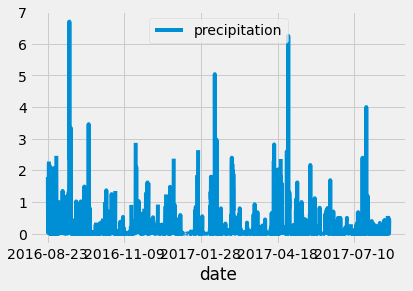

In [20]:
df.plot()

In [21]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
session.query(func.count(Station.station)).all()

[(9)]

In [23]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [25]:
session.query(Measurement.tobs)

In [26]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [27]:
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [28]:
df = pd.DataFrame(results, columns=['tobs'])

In [29]:
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


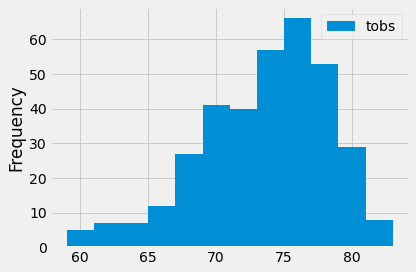

In [30]:
df.plot.hist(bins=12)
plt.tight_layout()

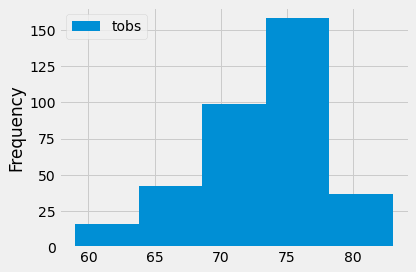

In [31]:
df.plot.hist(bins=5)
plt.tight_layout()

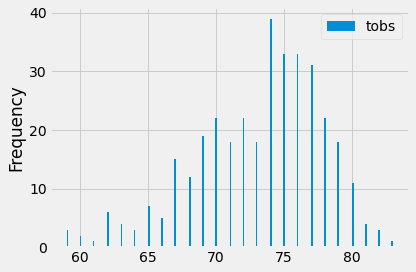

In [32]:
df.plot.hist(bins=200)
plt.tight_layout()

# Exploratory Climate Analysis

# Challenge

In [33]:
import datetime
import calendar
from datetime import timedelta

year = 2017
month = 6

num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)
j17_results = []
j17_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [34]:
print (j17_results)

[('2017-06-01', 0.0), ('2017-06-02', 0.0), ('2017-06-03', 0.02), ('2017-06-04', 0.0), ('2017-06-05', 0.0), ('2017-06-06', 0.0), ('2017-06-07', 0.0), ('2017-06-08', 0.0), ('2017-06-09', 0.0), ('2017-06-10', 0.04), ('2017-06-11', 0.08), ('2017-06-12', 0.02), ('2017-06-13', 0.0), ('2017-06-14', 0.0), ('2017-06-15', 0.0), ('2017-06-16', 0.0), ('2017-06-17', 0.0), ('2017-06-18', 0.05), ('2017-06-19', 0.0), ('2017-06-20', 0.02), ('2017-06-21', 0.0), ('2017-06-22', 0.0), ('2017-06-23', 0.0), ('2017-06-24', 0.06), ('2017-06-25', 0.0), ('2017-06-26', 0.0), ('2017-06-27', 0.0), ('2017-06-28', 0.0), ('2017-06-29', 0.0), ('2017-06-30', 0.08), ('2017-06-01', 0.03), ('2017-06-02', 0.1), ('2017-06-03', 0.2), ('2017-06-04', 0.15), ('2017-06-05', 0.0), ('2017-06-06', 0.0), ('2017-06-07', 0.0), ('2017-06-08', 0.02), ('2017-06-09', 0.02), ('2017-06-10', 0.21), ('2017-06-11', 0.24), ('2017-06-12', 0.19), ('2017-06-13', 0.36), ('2017-06-14', 0.27), ('2017-06-15', 0.17), ('2017-06-16', 0.02), ('2017-06-17',

In [35]:
june17_dataframe = pd.DataFrame(j17_results, columns=['date','precipitation']) 

In [36]:
june17_dataframe.set_index(june17_dataframe['date'], inplace = True)

In [37]:
june17_dataframe=june17_dataframe.sort_index()

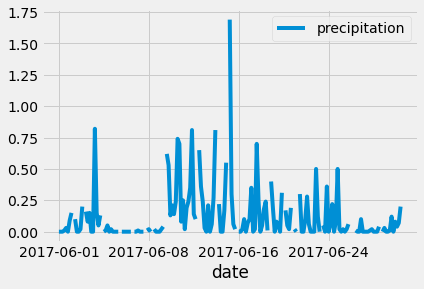

In [38]:
june17_dataframe.plot()

In [39]:
june17_dataframe.describe()

,precipitation
count,171.000000
mean,0.120000
std,0.217726
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


In [75]:
j17_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [76]:
print(j17_results)

[(74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), (65.0,), (68.0,), (62.0,), (75.0,), (70.0,), (69.0,), (76.0,), (76.0,), (74.0,), (73.0,), (71.0,), (74.0,), (74.0,), (72.0,), (71.0,), (72.0,), (74.0,), (69.0,), (67.0,)]


In [77]:
j17 = pd.DataFrame(j17_results, columns=['tobs'])

In [78]:
j17.describe()

,tobs
count,31.000000
mean,70.419355
std,3.364265
min,62.000000
25%,68.500000
50%,70.000000
75%,73.500000
max,76.000000


In [40]:
import datetime
import calendar
from datetime import timedelta

year = 2016
month = 6

num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)
j16_results = []
j16_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [41]:
print (j16_results)

[('2016-06-01', 0.06), ('2016-06-02', 0.0), ('2016-06-03', 0.0), ('2016-06-04', 0.0), ('2016-06-05', 0.0), ('2016-06-06', 0.0), ('2016-06-07', 0.01), ('2016-06-08', 0.0), ('2016-06-09', 0.01), ('2016-06-10', 0.05), ('2016-06-11', 0.0), ('2016-06-12', 0.01), ('2016-06-13', 0.0), ('2016-06-14', 0.0), ('2016-06-15', 0.01), ('2016-06-16', 0.02), ('2016-06-17', 0.02), ('2016-06-18', 0.0), ('2016-06-19', 0.01), ('2016-06-20', 0.01), ('2016-06-21', 0.0), ('2016-06-22', 0.0), ('2016-06-23', 0.0), ('2016-06-24', 0.01), ('2016-06-25', 0.03), ('2016-06-26', 0.01), ('2016-06-27', 0.01), ('2016-06-28', 0.0), ('2016-06-29', 0.0), ('2016-06-30', 0.0), ('2016-06-01', 0.89), ('2016-06-02', 0.15), ('2016-06-03', 0.16), ('2016-06-04', 0.0), ('2016-06-05', 0.63), ('2016-06-06', 0.36), ('2016-06-07', 0.4), ('2016-06-08', 0.0), ('2016-06-09', 0.21), ('2016-06-10', 0.06), ('2016-06-11', 0.02), ('2016-06-12', 0.04), ('2016-06-13', 0.08), ('2016-06-14', 0.06), ('2016-06-15', 0.18), ('2016-06-16', 0.03), ('2016

In [42]:
june16_dataframe = pd.DataFrame(j16_results, columns=['date','precipitation']) 

In [43]:
june16_dataframe.set_index(june16_dataframe['date'], inplace = True)

In [44]:
june16_dataframe=june16_dataframe.sort_index()

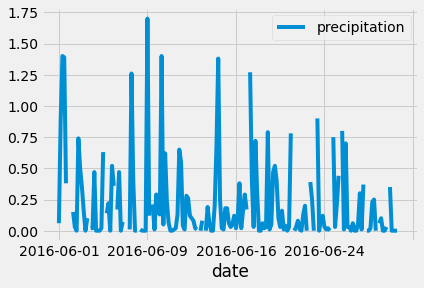

In [45]:
june16_dataframe.plot()

In [46]:
june16_dataframe.describe()

,precipitation
count,173.000000
mean,0.212312
std,0.327195
min,0.000000
25%,0.010000
50%,0.060000
75%,0.280000
max,1.700000


In [47]:
j16_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [48]:
print(j16_results)

[(69.0,), (67.0,), (68.0,), (65.0,), (70.0,), (72.0,), (74.0,), (73.0,), (71.0,), (75.0,), (72.0,), (75.0,), (76.0,), (75.0,), (76.0,), (75.0,), (71.0,), (75.0,), (75.0,), (72.0,), (72.0,), (75.0,), (73.0,), (76.0,), (74.0,), (77.0,), (72.0,), (71.0,), (76.0,), (77.0,)]


In [69]:
j16 = pd.DataFrame(j16_results, columns=['tobs'])

In [70]:
j16.describe()

,tobs
count,30.000000
mean,72.966667
std,3.022711
min,65.000000
25%,71.250000
50%,73.500000
75%,75.000000
max,77.000000


In [100]:
import datetime
import calendar
from datetime import timedelta

year = 2016
month = 12

num_days = calendar.monthrange(year, month)[1]
start_date = datetime.date(year, month, 1)
end_date = datetime.date(year, month, num_days)
d16_results = []
d16_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [101]:
print (d16_results)

[('2016-12-01', 0.12), ('2016-12-02', 0.03), ('2016-12-03', 0.0), ('2016-12-04', 0.03), ('2016-12-05', 0.43), ('2016-12-06', 0.02), ('2016-12-07', 0.0), ('2016-12-08', 0.03), ('2016-12-09', 0.52), ('2016-12-10', 0.05), ('2016-12-11', 0.04), ('2016-12-12', 0.01), ('2016-12-13', 0.05), ('2016-12-14', 0.03), ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.01), ('2016-12-18', 0.13), ('2016-12-19', 0.01), ('2016-12-20', 0.0), ('2016-12-21', 0.0), ('2016-12-22', 0.01), ('2016-12-23', 0.01), ('2016-12-24', 0.01), ('2016-12-25', 0.0), ('2016-12-26', 0.02), ('2016-12-27', 0.0), ('2016-12-28', 0.02), ('2016-12-29', 0.04), ('2016-12-30', 0.12), ('2016-12-31', 0.01), ('2016-12-01', 0.33), ('2016-12-02', 0.3), ('2016-12-03', 0.04), ('2016-12-04', 0.1), ('2016-12-05', 0.34), ('2016-12-06', 0.02), ('2016-12-07', 0.17), ('2016-12-08', 0.03), ('2016-12-09', 0.34), ('2016-12-10', 0.02), ('2016-12-11', 0.02), ('2016-12-12', 0.01), ('2016-12-13', 0.1), ('2016-12-14', 0.05), ('2016-12-15', 0.02)

In [102]:
december16_dataframe = pd.DataFrame(d16_results, columns=['date','precipitation'])

In [103]:
december16_dataframe.set_index(december16_dataframe['date'], inplace = True)

In [104]:
december16_dataframe=december16_dataframe.sort_index()

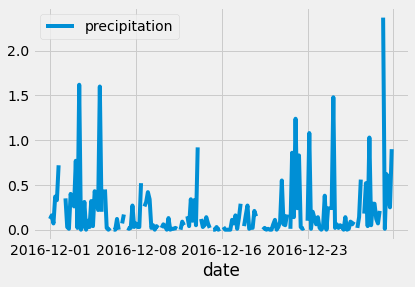

In [105]:
december16_dataframe.plot()

In [106]:
december16_dataframe.describe()

,precipitation
count,178.000000
mean,0.199494
std,0.342967
min,0.000000
25%,0.020000
50%,0.060000
75%,0.247500
max,2.370000


In [107]:
december_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [108]:
print(december_results)

[(74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), (65.0,), (68.0,), (62.0,), (75.0,), (70.0,), (69.0,), (76.0,), (76.0,), (74.0,), (73.0,), (71.0,), (74.0,), (74.0,), (72.0,), (71.0,), (72.0,), (74.0,), (69.0,), (67.0,)]


In [109]:
december_results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= start_date, Measurement.date <= end_date).all()

In [110]:
print(december_results)

[(74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), (66.0,), (65.0,), (68.0,), (62.0,), (75.0,), (70.0,), (69.0,), (76.0,), (76.0,), (74.0,), (73.0,), (71.0,), (74.0,), (74.0,), (72.0,), (71.0,), (72.0,), (74.0,), (69.0,), (67.0,)]


In [111]:
dec_temp_results = pd.DataFrame(december_results, columns=['temperature'])

In [112]:
dec_temp_results.describe()

,temperature
count,31.000000
mean,70.419355
std,3.364265
min,62.000000
25%,68.500000
50%,70.000000
75%,73.500000
max,76.000000


In [ ]:
Written Report

#In the month of June for 2017 the precipitation data was as follows: count was 171, mean:0.12, std:0.217726, min:0, 25%:0, 50%:0.02, 75%:0.15, max:1.69. In
#regards to how this compares to the precipitation data for December 2016; December's data is higher across the board with the 
#exception of the min being the same at 0. December's count was 178, mean:0.199494,std:0.342967,min:0,25%:0.02,50%:0.06,
#75%:0.2475, max:2.37. Now in regards to how this data compares to June 2016; count:173 (higher than June 2017, lower than Decmber)
#mean:0.212312(higher than June 2017 and December), std:0.327195(lower than December, higher than June 2017), min:0(same as others)
#25%:0.01(higher than June 2017, lower than December), 50%:0.06(same as December, higher than June 2017), 75%:0.28
#(higher than both December and June 2017),max 1.7(lower than December, slightly higher than June2017). 
#For temperature June 2016 is higher across the board than June 2017 with the exception of std. And December is the same as June 2017.

#recommendations
1) more data would aid in drawing more accurate conclusions that would provide greater insight
2) add a wind dimension like precipitation and temperature, wind is a deciding factor if someone is deciding to go to the beach
3) add a 'in shop' temperature dimension, becasue people like to have a place to take a break from the heat and this would aid in
overall customer satisfaction

